# Más cosas sobre la actividad 8 

In [1]:
import numpy as np
from astropy.table import Table
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import Curves2D
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from astropy.table import Table
import matplotlib.ticker as ticker
from scipy import interpolate

In [2]:
from matplotlib import colors

In [3]:
plt.rcParams['text.usetex'] = False

In [7]:
path_lin ='/home/ramiro/Facultad/Tesis/Datos/Actividad 07/' 
# path_win =

In [8]:
path_lin_fig = '/home/ramiro/Facultad/Tesis/Figuras/Actividad 8/'

In [9]:
table  = pd.read_csv(path_lin+'Aperturas_RefL0100N1504_snap_28_aperture_30.dat')
Ref    = table[(table['Stars_Mass']>=1e10)].copy()
Ref

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,10.139413,30,1.307842e+11,0.000000,1411.312012,3.002119e+14
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.727174,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.696796,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.714222,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,8.520104,30,3.944613e+10,0.000000,1411.312012,3.002119e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.740806,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.741599,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.743705,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.737761,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11


In [10]:
SF_O  = Ref['SF_Oxygen']
SF_H  = Ref['SF_Hydrogen']
SF_M  = Ref['SF_Mass']
M_Star= Ref['Stars_Mass']

M_O_SF = SF_O*SF_M
M_H_SF = SF_H*SF_M

Ref['sf_metalicity'] = 12+np.log10(M_O_SF/(16*M_H_SF))
Ref

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200,sf_metalicity
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,0.000000,0.000000,0.000000,10.139413,30,1.307842e+11,0.000000,1411.312012,3.002119e+14,NaN
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,0.004796,0.011342,0.841832,9.455478,30,6.641890e+10,0.823222,1411.312012,3.002119e+14,9.079824
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,0.010628,0.024796,12.094972,7.656161,30,1.183275e+11,10.984530,1411.312012,3.002119e+14,9.246274
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,0.007443,0.017283,1.334875,8.117089,30,2.024596e+10,1.322288,1411.312012,3.002119e+14,9.050028
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,0.000000,0.000000,0.000000,8.520104,30,3.944613e+10,0.000000,1411.312012,3.002119e+14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13131,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,0.002266,0.005160,0.456897,7.618259,30,1.191011e+10,0.433110,179.046371,6.129222e+11,9.085429
13145,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,0.002183,0.004858,1.192947,6.309848,30,1.063636e+10,1.192947,168.661011,5.124048e+11,9.024783
13155,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,0.001579,0.003758,0.506203,6.814752,30,1.192049e+10,0.506203,159.761032,4.354551e+11,9.286851
13164,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,0.002874,0.006602,0.686905,6.787498,30,1.124763e+10,0.604550,152.119400,3.759434e+11,9.115270


In [11]:
merger = pd.read_csv(path_lin+'Actividad_7(data_level_merge).dat')
merger

,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm
0,9498012,28000000000002,22.0,6.151898e-01,1.369978,22.0,0.615190,1.369978
1,9508202,28000000000002,26.0,1.827099e-01,1.000422,19.0,1.004122,1.325826
2,9512113,28000000000002,28.0,2.220446e-16,1.002306,24.0,0.365669,1.545269
3,9517736,28000000000002,28.0,2.220446e-16,1.147535,NaN,NaN,NaN
4,9519365,28000000000002,25.0,2.709011e-01,1.008288,5.0,7.049566,3.614620
...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,28.0,2.220446e-16,1.007574,11.0,3.527977,1.465920
3634,10859653,28000000002570,28.0,2.220446e-16,1.004723,12.0,3.016505,1.357690
3635,11104654,28000000002905,25.0,2.709011e-01,1.007583,NaN,NaN,NaN
3636,11247394,28000000003127,28.0,2.220446e-16,1.008742,NaN,NaN,NaN


In [12]:
df = pd.merge(left= Ref,right=merger, left_on='GalaxyID', right_on='GalaxyID_test')
df

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,Group_M_Crit200,sf_metalicity,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,3.002119e+14,NaN,9498012,28000000000002,22.0,6.151898e-01,1.369978,22.0,0.615190,1.369978
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,3.002119e+14,9.079824,9508202,28000000000002,26.0,1.827099e-01,1.000422,19.0,1.004122,1.325826
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,3.002119e+14,9.246274,9512113,28000000000002,28.0,2.220446e-16,1.002306,24.0,0.365669,1.545269
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,3.002119e+14,9.050028,9517736,28000000000002,28.0,2.220446e-16,1.147535,NaN,NaN,NaN
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,3.002119e+14,NaN,9519365,28000000000002,25.0,2.709011e-01,1.008288,5.0,7.049566,3.614620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,6.129222e+11,9.085429,10365607,28000000002202,28.0,2.220446e-16,1.007574,11.0,3.527977,1.465920
3634,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,5.124048e+11,9.024783,10859653,28000000002570,28.0,2.220446e-16,1.004723,12.0,3.016505,1.357690
3635,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,4.354551e+11,9.286851,11104654,28000000002905,25.0,2.709011e-01,1.007583,NaN,NaN,NaN
3636,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,3.759434e+11,9.115270,11247394,28000000003127,28.0,2.220446e-16,1.008742,NaN,NaN,NaN


In [13]:
table_bhm = pd.read_csv(path_lin+'BlackHoleMass_RefL0100N1504_snap_28.dat')
df = pd.merge(left=df,on='GalaxyID',right=table_bhm[['GalaxyID','BlackHoleMass']],copy=False)
df

,GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,...,sf_metalicity,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm,BlackHoleMass
0,9498012,28000000000002,28,2.220446e-16,6,8.913222,35.828056,54.839039,1.538708e+11,0.000000e+00,...,NaN,9498012,28000000000002,22.0,6.151898e-01,1.369978,22.0,0.615190,1.369978,2.491242e+08
1,9508202,28000000000002,28,2.220446e-16,7,6.904262,35.705917,57.397373,7.604099e+10,2.281596e+09,...,9.079824,9508202,28000000000002,26.0,1.827099e-01,1.000422,19.0,1.004122,1.325826,1.143880e+08
2,9512113,28000000000002,28,2.220446e-16,8,8.682913,35.504921,54.217369,1.345128e+11,1.514760e+10,...,9.246274,9512113,28000000000002,28.0,2.220446e-16,1.002306,24.0,0.365669,1.545269,4.090832e+07
3,9517736,28000000000002,28,2.220446e-16,9,8.278317,37.063808,54.914932,2.232997e+10,2.754609e+09,...,9.050028,9517736,28000000000002,28.0,2.220446e-16,1.147535,NaN,NaN,NaN,2.961948e+07
4,9519365,28000000000002,28,2.220446e-16,10,8.262937,36.454063,55.901993,4.833353e+10,0.000000e+00,...,NaN,9519365,28000000000002,25.0,2.709011e-01,1.008288,5.0,7.049566,3.614620,2.840516e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,10365607,28000000002202,28,2.220446e-16,0,35.516003,10.797990,34.600616,1.226640e+10,1.538676e+09,...,9.085429,10365607,28000000002202,28.0,2.220446e-16,1.007574,11.0,3.527977,1.465920,3.630704e+06
3634,10859653,28000000002570,28,2.220446e-16,0,61.355499,48.616516,65.236801,1.094640e+10,3.207207e+09,...,9.024783,10859653,28000000002570,28.0,2.220446e-16,1.004723,12.0,3.016505,1.357690,2.257465e+06
3635,11104654,28000000002905,28,2.220446e-16,0,97.197350,82.709518,43.676567,1.200869e+10,1.247963e+09,...,9.286851,11104654,28000000002905,25.0,2.709011e-01,1.007583,NaN,NaN,NaN,1.639211e+06
3636,11247394,28000000003127,28,2.220446e-16,0,88.764885,47.226864,81.905136,1.186733e+10,2.167418e+09,...,9.115270,11247394,28000000003127,28.0,2.220446e-16,1.008742,NaN,NaN,NaN,1.110667e+06


In [14]:
del Ref

In [15]:
cosmo = FlatLambdaCDM(H0=67.77, Om0=0.307)

In [16]:
df['t_lm']      = cosmo.age(df['z_lm']).value
df['t_lmm']     = cosmo.age(df['z_lmm']).value
df['f_gas']     = (df['SF_Mass'])/(df['Stars_Mass']+df['SF_Mass'])
df['mbh_mstar'] = np.log10(df['BlackHoleMass']/df['Stars_Mass'])

/home/ramiro/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df.columns

Index(['GalaxyID', 'GroupID', 'SnapNum', 'Redshift', 'SubGroupNumber',
       'CentreOfPotential_x', 'CentreOfPotential_y', 'CentreOfPotential_z',
       'Stars_Mass', 'SF_Mass', 'NSF_Mass', 'MassType_DM', 'MassType_BH',
       'HalfMassRad_Star', 'HalfMassRad_Gas', 'HalfMassRad_DM',
       'Stars_Hydrogen', 'Stars_Oxygen', 'Stars_Metallicity', 'SF_Hydrogen',
       'SF_Oxygen', 'SF_Metallicity', 'NSF_Hydrogen', 'NSF_Oxygen',
       'NSF_Metallicity', 'StarFormationRate', 'InitialMassWeightedStellarAge',
       'ApertureSize', 'Mass_Star', 'SFR_30pkpc', 'Group_R_Crit200',
       'Group_M_Crit200', 'sf_metalicity', 'GalaxyID_test', 'GroupID_test',
       'snap_lm', 'z_lm', 'L_lm', 'snap_lmm', 'z_lmm', 'L_lmm',
       'BlackHoleMass', 't_lm', 't_lmm', 'f_gas', 'mbh_mstar'],
      dtype='object')

# Residuos

In [18]:
mask = (df['sf_metalicity'].notna())
xvar = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar = df['sf_metalicity'][mask].to_numpy()

In [19]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [20]:
x      = np.append(10,xmedian)
y      = np.append(ymedian[0],ymedian)

f      = interpolate.interp1d(x, y)
f_err_u= interpolate.interp1d(x, np.append(yerror[1][0],yerror[1]))
f_err_d= interpolate.interp1d(x, np.append(yerror[0][0],yerror[0]))

**Valores continuos de la función interpoladora para la mediana junto con sus errores**

In [21]:
xnew = np.arange(min(x),max(x) , 0.0001)
ynew = f(xnew)   # use interpolation function returned by `interp1d`

y_error_n=[[],[]]
y_error_n[1] = f_err_u(xnew)
y_error_n[0] = f_err_d(xnew)

In [22]:
# df.columns

In [23]:
parametro ='f_gas'  # Parámetro que usamos para calcular los residuos.

mask = (df['sf_metalicity'].notna())&(np.log10(df['Stars_Mass'])<max(x))&(df[parametro].notna())#&(df['Stars_Mass']>1e11)&(df['Stars_Mass']<1e12)#&(merge['SubGroupNumber']==0)
xvar = np.log10(df['Stars_Mass'])[mask].to_numpy()
yvar = df['sf_metalicity'][mask].to_numpy()
zvar = df[parametro][mask].to_numpy()

In [24]:
gal_sup =[]
gal_inf =[]
gal_mean=[]

for i in np.arange(len(xvar)):
    sup = f(xvar[i]) + f_err_u(xvar[i])- yvar[i]
    inf = f(xvar[i]) - f_err_d(xvar[i])- yvar[i]
    if sup*inf<0:
        gal_mean.append(i)
    elif abs(sup)<abs(inf):
        gal_sup.append(i)
    else: gal_inf.append(i)

In [25]:
residuos = np.ones_like(xvar,dtype=float)

for i in np.arange(len(xvar)):
    residuos[i] = -(f(xvar[i]) - yvar[i])

In [26]:
map_c = {'log(Mstar)':xvar,'residuos':residuos,str(parametro):zvar}

In [27]:
xvar_sup = np.ones_like(gal_sup,dtype=float)
xvar_inf = np.ones_like(gal_inf,dtype=float)
xvar_mean= np.ones_like(gal_mean,dtype=float)

yvar_sup = np.ones_like(gal_sup,dtype=float)
yvar_inf = np.ones_like(gal_inf,dtype=float)
yvar_mean= np.ones_like(gal_mean,dtype=float)

zvar_sup = np.ones_like(gal_sup,dtype=float)
zvar_inf = np.ones_like(gal_inf,dtype=float)
zvar_mean= np.ones_like(gal_mean,dtype=float)

for i in np.arange(len(gal_sup)):
    xvar_sup[i] = xvar[gal_sup[i]]
    yvar_sup[i] = yvar[gal_sup[i]]
    zvar_sup[i] = zvar[gal_sup[i]]
    
for i in np.arange(len(gal_inf)):
    xvar_inf[i] = xvar[gal_inf[i]]
    yvar_inf[i] = yvar[gal_inf[i]]
    zvar_inf[i] = zvar[gal_inf[i]]
    
for i in np.arange(len(gal_mean)):
    xvar_mean[i] = xvar[gal_mean[i]]
    yvar_mean[i] = yvar[gal_mean[i]]
    zvar_mean[i] = zvar[gal_mean[i]]

In [28]:
xvar = zvar
yvar = residuos

In [29]:
nbins=10       # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xvar,yvar,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

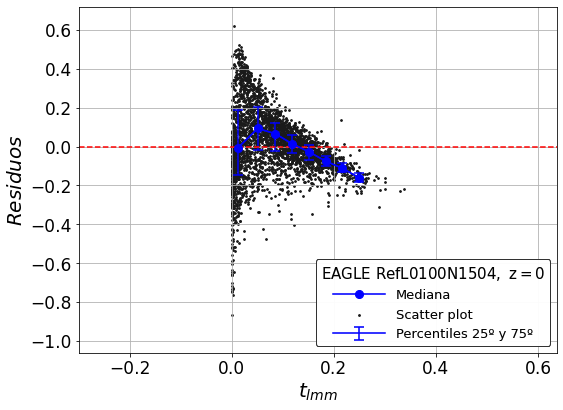

In [30]:
fig,ax=plt.subplots(figsize=(8,6))

xlim=(min(zvar)-0.3,max(zvar)+0.3)
ylim=(min(residuos)+0.4,max(residuos)+0.1)

xlabel=r'$t_{lmm}$'
ylabel=r'$Residuos$'

ax.set_xlabel(xlabel,fontsize=20)
ax.set_ylabel(ylabel,fontsize=20)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(axis='both', which='major', labelsize=17)
                
plt.subplots_adjust(left=0.12,right=0.95,bottom=0.15,top=0.95)

# scatter plot
ax.scatter(zvar,residuos,marker='o',s=3,c='0.1',label='Scatter plot')

ax.plot(xmedian,ymedian,c='b',marker='o',ms=8,linestyle='-',linewidth=1.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='b',marker='',markersize=1,linestyle='-',
           linewidth=1.5,label='Percentiles 25º y 75º',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=13)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

# plt.title(r'$Residuos\ de\ t_{lmm}\ para\ gal\ entre\ 10^{11}\ y\ 10^{12}\ masas\ solares.$',fontdict={'fontsize':18})

ax.add_artist(leg1)

plt.grid()    
plt.hlines(0,xlim[0],xlim[1],colors = 'r',linestyles='dashed')


# plt.savefig(path_lin_fig+'residuos_tlmm2.png')
plt.show()

**Para color maps de los residuos**

In [31]:
map_c = pd.DataFrame(map_c)
map_c

,log(Mstar),residuos,f_gas
0,10.881048,-0.060853,0.029131
1,11.128763,0.159230,0.101213
2,10.348888,-0.109588,0.109813
3,10.733089,-0.071606,0.045254
4,10.112386,0.028849,0.116337
...,...,...,...
3067,10.088717,-0.064285,0.111457
3068,10.039271,-0.124931,0.226600
3069,10.079495,0.137138,0.094139
3070,10.074353,-0.034443,0.154432


In [32]:
map_c_color = Table(data= np.array(map_c),names= map_c.keys())

In [33]:
# Condiciones para seleccionar muestra
# mask=(map_c_color['Stars_Mass']>=1e10)&(map_c_color['sf_metalicity']>0)&(map_c_color[parametro]>0)

data={}
for key in map_c_color.keys():
    data[key] = map_c_color[key]

In [34]:
# Variables (ejes) a graficar
xplot = data[parametro]
yplot = data['residuos']

# xlabel= r'$\log(MBH/M_\bigstar)~[\rm{M}_\odot]$'
xlabel= r'$F_{gas}$'
ylabel= r'$Residuos$'

In [35]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color=data['log(Mstar)']

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$\log(M_\bigstar)~[\rm{M}_\odot]$'

# Número de bines en cada eje
nbinsx=60
nbinsy=50
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-37-be97af49a7b3>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


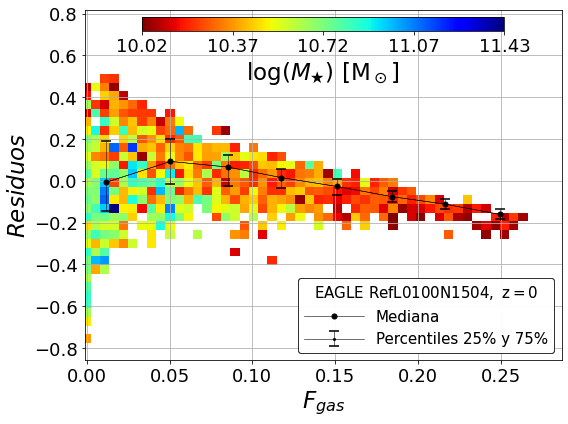

In [37]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=23)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=18)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    
# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=23)
ax.set_ylabel(ylabel,fontsize=23)

xmin,xmax=min(xplot)-0.001,max(xplot)-0.05
# xmin, xmax =-4.7,-2.3
ax.set_xlim(xmin,xmax)

ymin,ymax=min(yplot)+0.6,max(yplot)+0.2
# ymin,ymax= 8.5,10
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=18)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Percentiles 25% y 75%',capsize=5,capthick=1.5)

leg1=ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=15)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

ax.add_artist(leg1)
plt.grid() 

fig.tight_layout()

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'prueba_fgas.png')
   
plt.show()

**Simplemente los clor maps**

In [33]:
# Parámetro que colorea
parametro= 'Group_M_Crit200'

In [34]:
astro_merge = Table(data=np.array(df),names=df.keys())

In [35]:
# Condiciones para seleccionar muestra
mask=(astro_merge['Stars_Mass']>=1e10)&(astro_merge['sf_metalicity']>0)&(astro_merge[parametro]>0)

data={}
for key in astro_merge.keys():
    data[key]=astro_merge[key][mask]

In [36]:
# Variables (ejes) a graficar
xplot = np.log10(data['Stars_Mass'])
yplot = data['sf_metalicity']

xlabel= r'$\log(M_\bigstar)~[\rm{M}_\odot]$'
ylabel= r'$12+log(O/H)$'

In [37]:
nbins=10        # Numero de bins en variable x a usar para dividir la muestra
perc_low=25.        # Percentil a usar como cota inferior de error
perc_high=75.       # Percentil a usar como cota superior de error
min_count=10         # Mínima cantidad de elementos para considerar en un bin

xmedian,ymedian,xerror,yerror,elements=Curves2D.median_curve(xplot,yplot,bins=nbins,min_count=min_count,
                                                             perc_low=perc_low,perc_high=perc_high)

In [47]:
#-------------------- Variables para pintar grilla 2D-----------------------------------------------
# Variable a usar para colorear
var_color= np.log10(data[parametro])

# Estadístico a usar ('counts','mean','median')
statistic='median'

# 'counts' es para contar el número de galaxias en cada bin (digamos, es para hacer un histograma2D)
# 'mean' y 'median' son para calcular la media o la mediana de var en cada bin.
           
# Label to use in color bar reference
var_label=r'$\log(M_{200})~[\rm{M}_\odot]$'

# Número de bines en cada eje
nbinsx=40
nbinsy=30
    
# Minimum number of galaxies to color bin (bins with less galaxies than this value will
# not be taken into account)
cmin=2

# Color map to use. Use 'mapname_r' to invert colours. For example, if want to
# invert the color map "jet", use "jet_r".
cmap='jet_r'

<ipython-input-74-ca0904cf272a>:79: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet_r"))
  cmap.set_under('white')                      # "bad-defined" bins will be of colour white.


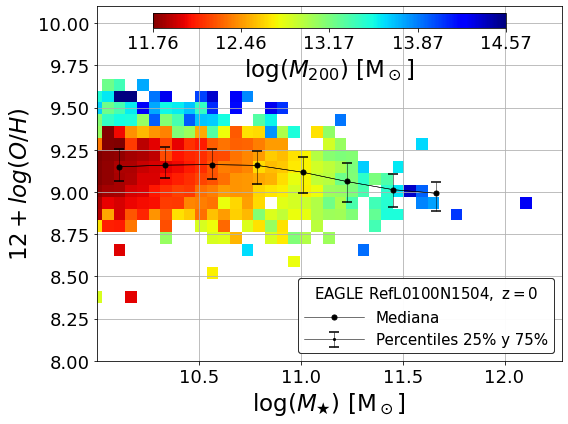

In [74]:
# Plot color map
fig,ax=plt.subplots(figsize=(8,6))

# Intervals of binning, as function of nbinsx and nbinsy:
intx=(max(xplot)-min(xplot))/nbinsx
inty=(max(yplot)-min(yplot))/nbinsy

# If 'var_color' is an empty sequence or 'statistic=='counts'', plot a 2D histogram. 
if (var_color==[]) or (statistic=='counts'):   
    # Min and Max of each variable
    xmin,xmax=min(xplot),max(xplot)
    xlim=[xmin,xmax]

    ymin,ymax=min(yplot),max(yplot)
    ylim=[ymin,ymax]
        
    # Construct the 2D histogram
    hist2d,xedges,yedges,im=ax.hist2d(xplot, yplot, bins=(nbinsx,nbinsy),cmap=cmap,
                                      range=(xlim,ylim),cmin=cmin)
    var_label='N'
        
# If not want to plot a 2D histogram, construct the color map
else:
            #Define a "density" array of 2x2 used for binning. Its elements will be the values of the statistic
            density=np.zeros((nbinsy+1,nbinsx+1))    # NOTE THE TRANSPOSITION OF AXIS! It is done like this in
                                                     # order to use 'meshgrid' later.

            # Calculate the desired statistic in each bin
            auxx=min(xplot)
            for i in range(nbinsx+1):
                auxy=min(yplot)
                for j in range(nbinsy+1):
                    # Select data of elements that belong to the bin
                    var=var_color[(xplot >= auxx) & (xplot < auxx+intx) & (yplot >= auxy) & (yplot < auxy+inty)]
                    # Calculate the statistic in the bin, if there are at least cmin elements inside the bin.
                    if (var.size >=cmin):
                        if statistic=='mean':
                            stat_val=np.mean(var)
                        elif statistic=='median':
                            stat_val=np.median(var)                        
                    # If not enough elements in the bin, assign the value -1e99 to the statistic        
                    else:
                        stat_val=-1e99
                
                    # Overwrite the [j,i] element (bin) of density array with the calculated statistic
                    density[j,i]=stat_val
                    auxy=auxy+inty
                auxx=auxx+intx

            # Define x-coordinates of 2D grid
            x=np.zeros(nbinsx+1)
            auxx=min(xplot)
            for i in range(nbinsx+1):
                x[i]=auxx
                auxx=auxx+intx
            
            # Define y-coordinates of 2D grid
            y=np.zeros(nbinsy+1)
            auxy=min(yplot)
            for j in range(nbinsy+1):
                y[j]=auxy
                auxy=auxy+inty

            # Construct two 2D array with grid coordinates
            x,y=np.meshgrid(x,y)

            # Define again the density (statistic) array
            z=density
        
            # IMPORTANT!!: x, y, z MUST have the same shape.

            # Search min and max of statistic, considering only bins with "well-defined" statistic
            densitylim=density[density > -1e99]
            vmin=np.amin(densitylim)
            vmax=np.amax(densitylim)

            # Prepare the color map
            cmap = plt.get_cmap(cmap)       # Name of the color map
            cmap.set_under('white')                      # "bad-defined" bins will be of colour white. 
            norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=False)    # Normalize colors to the interval (vmin,vmax)

            # Construct color grid
            im=ax.pcolormesh(x,y,z,cmap=cmap,norm=norm,shading='auto')                     

# Barra de referencia y "tuneo" del gráfico
# Add an axis that will contain the color bar 
cbaxes=ax.inset_axes([0.12,0.94,0.76,0.04]) 

# Construct color bar using the color grid (object 'im')
cbar=plt.colorbar(im,cax=cbaxes,orientation='horizontal')   
cbar.set_label(var_label,fontsize=23)    # Label of color bar
cbaxes.tick_params(axis='both', which='major', labelsize=18)   # Size of ticks labels

# Number of ticks in color bar
loc = ticker.LinearLocator(numticks=5)   # For simplicity, use always linear-separated ticks in the color bar
cbar.locator=loc
cbar.update_ticks()
if (var_color==[]) or (statistic=='counts'):   # Format the string of color bar ticks label
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
else:
    cbaxes.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

# Ajustar cosas del gráfico
ax.set_xlabel(xlabel,fontsize=23)
ax.set_ylabel(ylabel,fontsize=23)

xmin,xmax=min(xplot),max(xplot)
ax.set_xlim(xmin,xmax)

# ymin,ymax=min(yplot),max(yplot)+1
ymin,ymax= 8,10.1
ax.set_ylim(ymin,ymax)

ax.tick_params(axis='both',labelsize=18)

ax.plot(xmedian,ymedian,c='k',marker='o',ms=5,linestyle='-',linewidth=0.5,label='Mediana')

ax.errorbar(xmedian,ymedian,yerr=yerror,
           c='k',marker='o',markersize=2,linestyle='-',
           linewidth=0.5,label='Percentiles 25% y 75%',capsize=5,capthick=1.5)

leg1 = ax.legend(edgecolor='0.1',loc='lower right',handlelength=4,fontsize=15)
leg1.set_title(r'$\rm{EAGLE\ RefL0100N1504},\ z=0$',prop={'size':15})

ax.add_artist(leg1)

fig.tight_layout()

plt.grid()    

# Guardar la figura, si es necesario
# plt.savefig(path_lin_fig+'prueba_m200.png')
    
plt.show()

In [42]:
astro_merge

GalaxyID,GroupID,SnapNum,Redshift,SubGroupNumber,CentreOfPotential_x,CentreOfPotential_y,CentreOfPotential_z,Stars_Mass,SF_Mass,NSF_Mass,MassType_DM,MassType_BH,HalfMassRad_Star,HalfMassRad_Gas,HalfMassRad_DM,Stars_Hydrogen,Stars_Oxygen,Stars_Metallicity,SF_Hydrogen,SF_Oxygen,SF_Metallicity,NSF_Hydrogen,NSF_Oxygen,NSF_Metallicity,StarFormationRate,InitialMassWeightedStellarAge,ApertureSize,Mass_Star,SFR_30pkpc,Group_R_Crit200,Group_M_Crit200,sf_metalicity,GalaxyID_test,GroupID_test,snap_lm,z_lm,L_lm,snap_lmm,z_lmm,L_lmm,t_lm,t_lmm
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
9498012.0,28000000000002.0,28.0,2.220446049250313e-16,6.0,8.913222312927246,35.82805633544922,54.83903884887695,153870811136.0,0.0,0.0,1155126001664.0,326427936.0,8.82857894897461,0.0,51.459739685058594,0.7026193737983704,0.010399248450994492,0.022647753357887268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.139412879943848,30.0,130784231424.0,0.0,1411.31201171875,300211872202752.0,nan,9498012.0,28000000000002.0,22.0,0.615189790725708,1.3699783086776731,22.0,0.615189790725708,1.3699783086776731,7.8410962893475356,7.8410962893475356
9508202.0,28000000000002.0,28.0,2.220446049250313e-16,7.0,6.904261589050293,35.70591735839844,57.39737319946289,76040994816.0,2281595904.0,2092023296.0,1333669920768.0,153116688.0,5.646944999694824,13.542415618896484,58.068565368652344,0.7066195011138916,0.009626749902963638,0.020858213305473328,0.6832898259162903,0.013138599693775177,0.03112853690981865,0.7271736264228821,0.00479557691141963,0.011341881938278677,0.8418323397636414,9.455477714538574,30.0,66418896896.0,0.8232219219207764,1411.31201171875,300211872202752.0,9.079824143927127,9508202.0,28000000000002.0,26.0,0.18270987272262573,1.0004215240478516,19.0,1.0041216611862185,1.3258264064788818,11.501236378239332,5.863787520454594
9512113.0,28000000000002.0,28.0,2.220446049250313e-16,8.0,8.682912826538086,35.504920959472656,54.217369079589844,134512754688.0,15147602944.0,1042459904.0,928455786496.0,82226744.0,8.825948715209961,8.690081596374513,31.70903015136719,0.6920113563537598,0.011878891848027706,0.027148611843585968,0.6534036993980408,0.018432127311825752,0.04389937222003937,0.6967960000038147,0.010628251358866692,0.024796441197395325,12.094971656799315,7.656161308288574,30.0,118327468032.0,10.984530448913574,1411.31201171875,300211872202752.0,9.246273889789705,9512113.0,28000000000002.0,28.0,2.220446049250313e-16,1.0023058652877808,24.0,0.3656685650348663,1.5452693700790403,13.820529799271933,9.69806995300339
9517736.0,28000000000002.0,28.0,2.220446049250313e-16,9.0,8.278317451477049,37.06380844116211,54.91493225097656,22329968640.0,2754609408.0,2897005312.0,1024233177088.0,64983852.0,4.57615852355957,11.246858596801758,90.40345764160156,0.7146576046943665,0.007867894135415554,0.017358046025037766,0.6876013278961182,0.01234482042491436,0.02905323728919029,0.714222252368927,0.0074434070847928515,0.017283415421843532,1.334875226020813,8.11708927154541,30.0,20245956608.0,1.3222882747650146,1411.31201171875,300211872202752.0,9.050028087427048,9517736.0,28000000000002.0,28.0,2.220446049250313e-16,1.1475350856781006,nan,nan,nan,13.820529799271933,nan
9519365.0,28000000000002.0,28.0,2.220446049250313e-16,10.0,8.262936592102049,36.454063415527344,55.90199279785156,48333529088.0,0.0,0.0,721738006528.0,60787016.0,9.24900722503662,0.0,45.27470397949219,0.7076855301856995,0.009212474338710308,0.020505616441369057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.52010440826416,30.0,39446126592.0,0.0,1411.31201171875,300211872202752.0,nan,9519365.0,28000000000002.0,25.0,0.27090108394622797,1.0082877874374392,5.0,7.0495662689208975,3.6146204471588135,10.576506867357692,0.7595863600605295
9521792.0,28000000000002.0,28.0,2

In [101]:
parametro ='t_lmm'  # Parámetro que usamos para calcular los residuos.

mask_1 = (df['sf_metalicity'].notna())&(np.log10(df['Stars_Mass'])<max(x))&(df[parametro].notna())#&(df['Stars_Mass']>1e11)&(df['Stars_Mass']<1e12)#&(merge['SubGroupNumber']==0)
mask_2 = (df['sf_metalicity'].notna())&(np.log10(df['Stars_Mass'])<max(x))&(df[parametro].isna())

xvar_1 = np.log10(df['Stars_Mass'])[mask_1].to_numpy()
yvar_1 = df['sf_metalicity'][mask_1].to_numpy()

xvar_2 = np.log10(df['Stars_Mass'])[mask_2].to_numpy()
yvar_2 = df['sf_metalicity'][mask_2].to_numpy()

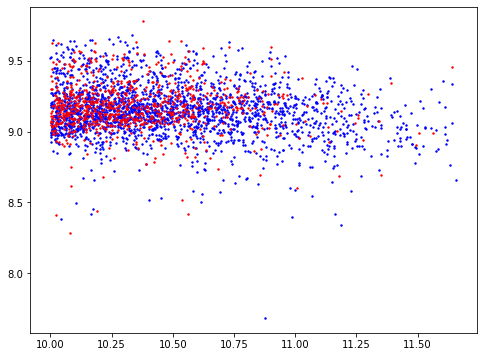

In [105]:
fig,ax = plt.subplots(figsize=(8,6))
ax.scatter(xvar_1,yvar_1,marker='o',s=2,c='b',label='Scatter plot')
ax.scatter(xvar_2,yvar_2,marker='o',s=2,c='r',label='Scatter plot')

In [42]:
data.keys()

dict_keys(['GalaxyID', 'GroupID', 'SnapNum', 'Redshift', 'SubGroupNumber', 'CentreOfPotential_x', 'CentreOfPotential_y', 'CentreOfPotential_z', 'Stars_Mass', 'SF_Mass', 'NSF_Mass', 'MassType_DM', 'MassType_BH', 'HalfMassRad_Star', 'HalfMassRad_Gas', 'HalfMassRad_DM', 'Stars_Hydrogen', 'Stars_Oxygen', 'Stars_Metallicity', 'SF_Hydrogen', 'SF_Oxygen', 'SF_Metallicity', 'NSF_Hydrogen', 'NSF_Oxygen', 'NSF_Metallicity', 'StarFormationRate', 'InitialMassWeightedStellarAge', 'ApertureSize', 'Mass_Star', 'SFR_30pkpc', 'Group_R_Crit200', 'Group_M_Crit200', 'sf_metalicity', 'GalaxyID_test', 'GroupID_test', 'snap_lm', 'z_lm', 'L_lm', 'snap_lmm', 'z_lmm', 'L_lmm', 't_lm', 't_lmm'])